In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
data.shape

(908, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

it shows some of column has a oject type data some of having float type will convert that catogorical data into numerical in sucessive steps

In [5]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


table shows that some of column has zero total count it does not have any data so will drop that columns in further steps

In [6]:
data.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
capacity_mw,1.000000,0.050107,0.198377,NaN,0.294661,NaN,NaN,0.823513,0.850698,0.855834,0.881209,0.896785,NaN
latitude,0.050107,1.000000,0.031501,NaN,0.120944,NaN,NaN,0.050720,0.059826,0.048103,0.040832,0.039711,NaN
longitude,0.198377,0.031501,1.000000,NaN,0.114167,NaN,NaN,0.017461,0.013678,0.023087,0.051128,0.049320,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.294661,0.120944,0.114167,NaN,1.000000,NaN,NaN,0.137351,0.160896,0.171964,0.195301,0.193421,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.823513,0.050720,0.017461,NaN,0.137351,NaN,NaN,1.000000,0.968904,0.908396,0.894752,0.859459,NaN
generation_gwh_2014,0.850698,0.059826,0.013678,NaN,0.160896,NaN,NaN,0.968904,1.000000,0.961105,0.937091,0.912585,NaN
generation_gwh_2015,0.855834,0.048103,0.023087,NaN,0.171964,NaN,NaN,0.908396,0.961105,1.000000,0.974955,0.940274,NaN


it gives the correlation among itself and to the other columns also

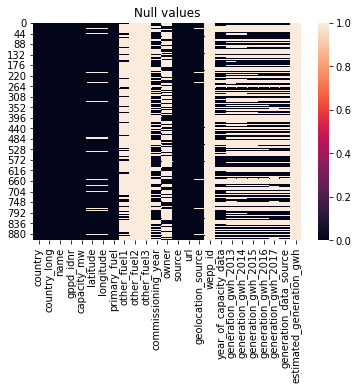

In [7]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

fig shows the null values in data set of various columns

<AxesSubplot:>

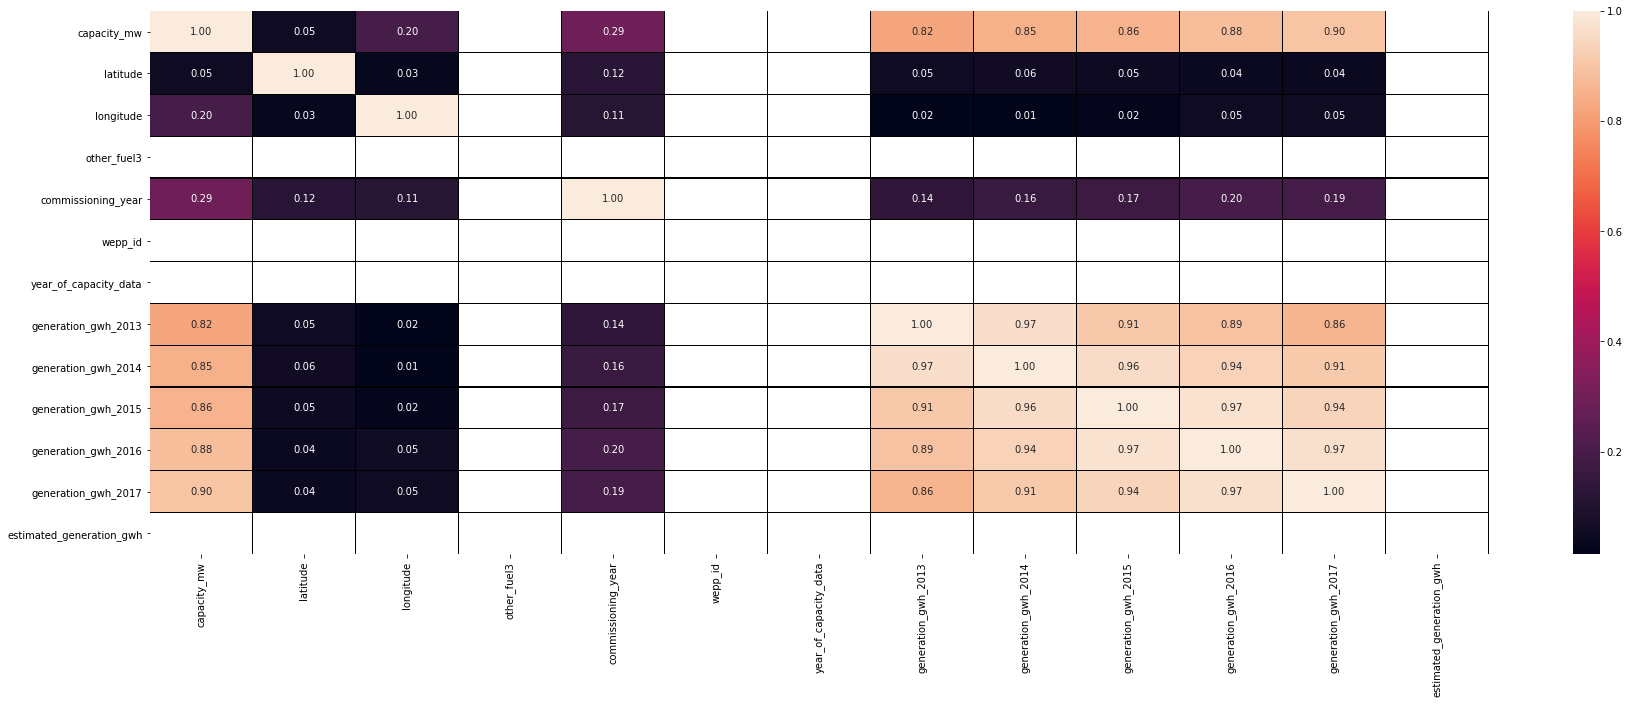

In [8]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

it shows that some of columns has no values in it so will drop it

In [9]:
data.drop(['other_fuel3','geolocation_source','source','url','wepp_id','year_of_capacity_data','estimated_generation_gwh','country_long'],axis=1,inplace=True)

<AxesSubplot:>

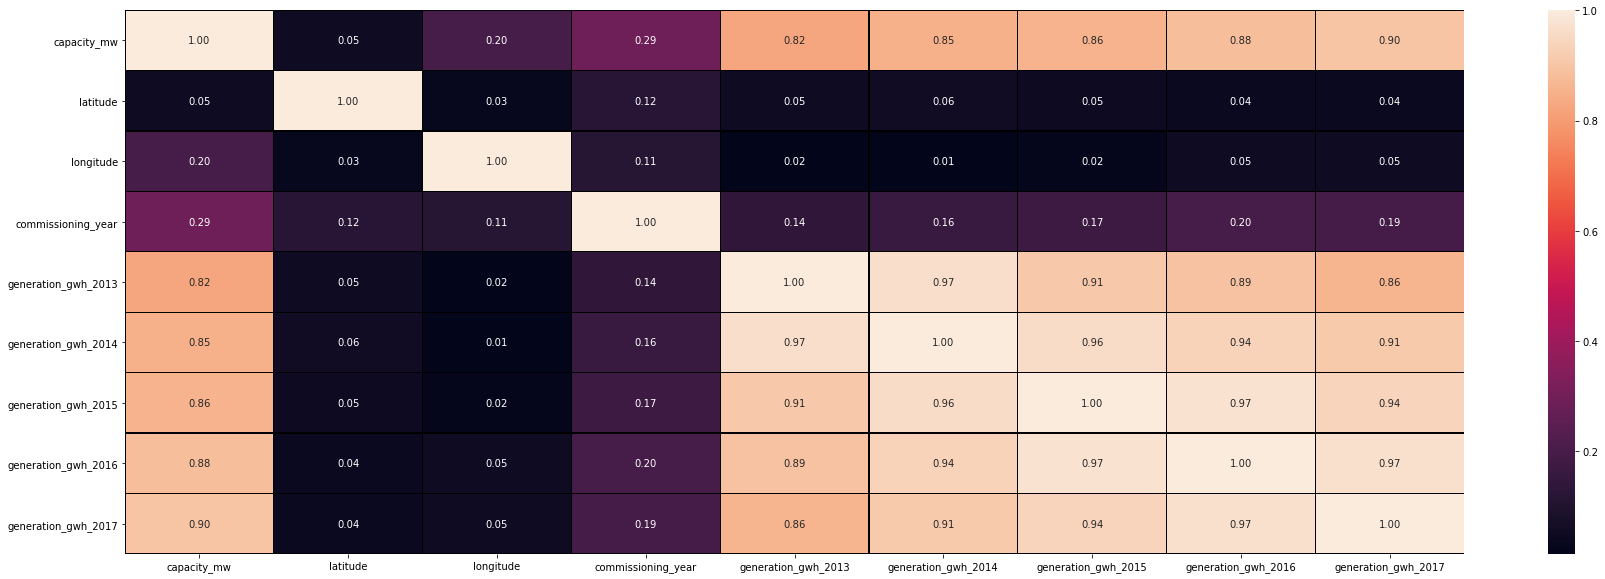

In [10]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

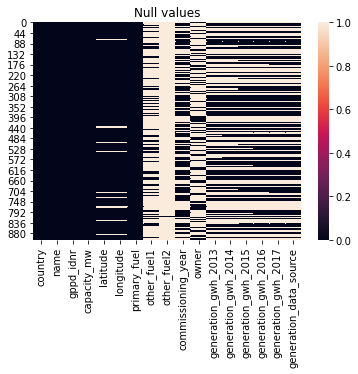

In [11]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [12]:
data.shape

(908, 17)

In [13]:
data.columns

Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'commissioning_year',
       'owner', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

# DATA ENCODING

lets will convert the categorical data into countinuous type of data

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
label=le.fit_transform(data["country"])
label
data=data.drop("country",axis='columns')
data["country"]=label


In [16]:
le=LabelEncoder()
label=le.fit_transform(data["name"])
label
data=data.drop("name",axis='columns')
data["name"]=label


In [17]:
le=LabelEncoder()
label=le.fit_transform(data["gppd_idnr"])
label
data=data.drop("gppd_idnr",axis='columns')
data["gppd_idnr"]=label


In [18]:
le=LabelEncoder()
label=le.fit_transform(data["primary_fuel"])
label
data=data.drop("primary_fuel",axis='columns')
data["primary_fuel"]=label


In [19]:
le=LabelEncoder()
label=le.fit_transform(data["owner"])
label
data=data.drop("owner",axis='columns')
data["owner"]=label


In [20]:
le=LabelEncoder()
label=le.fit_transform(data["generation_data_source"])
label
data=data.drop("generation_data_source",axis='columns')
data["generation_data_sourcer"]=label
data

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,country,name,gppd_idnr,primary_fuel,owner,generation_data_sourcer
0,2.5,28.1839,73.2407,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,0,0,658,6,229,1
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,520,1,258,1
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,854,7,2,1
3,135.0,23.8712,91.3602,NaN,NaN,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,3,0,2,280,0
4,1800.0,21.9603,82.4091,Oil,NaN,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,4,1,1,280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Oil,NaN,2016.0,NaN,NaN,0.994875,233.596650,865.400000,0,903,494,1,280,0
904,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,904,823,6,114,1
905,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,905,892,7,280,1
906,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,906,540,1,91,1


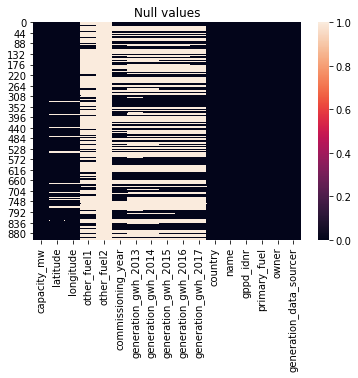

In [21]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [22]:
data.isna().sum()

capacity_mw                  0
latitude                    46
longitude                   46
other_fuel1                709
other_fuel2                907
commissioning_year         380
generation_gwh_2013        524
generation_gwh_2014        507
generation_gwh_2015        483
generation_gwh_2016        471
generation_gwh_2017        465
country                      0
name                         0
gppd_idnr                    0
primary_fuel                 0
owner                        0
generation_data_sourcer      0
dtype: int64

it shows that some of columns has na values lets will deal with them in further steps

In [23]:
data.drop(['other_fuel1','other_fuel2'],axis=1,inplace=True)

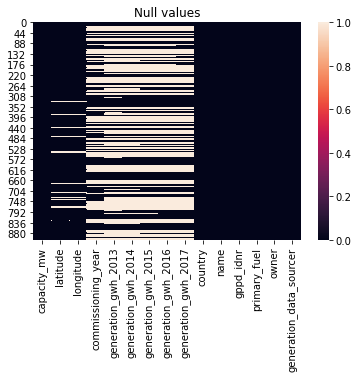

In [24]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [25]:
data['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

In [26]:
le=LabelEncoder()
label=le.fit_transform(data["latitude"])
label
data=data.drop("latitude",axis='columns')
data["latitude"]=label
data

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,country,name,gppd_idnr,primary_fuel,owner,generation_data_sourcer,latitude
0,2.5,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,0,0,658,6,229,1,730
1,98.0,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,0,1,520,1,258,1,593
2,39.2,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,0,2,854,7,2,1,420
3,135.0,91.3602,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,3,0,2,280,0,546
4,1800.0,82.4091,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,4,1,1,280,0,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,77.3568,2016.0,NaN,NaN,0.994875,233.596650,865.400000,0,903,494,1,280,0,177
904,3.0,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,0,904,823,6,114,1,104
905,25.5,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,0,905,892,7,280,1,152
906,80.0,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,0,906,540,1,91,1,571


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   capacity_mw              908 non-null    float64
 1   longitude                862 non-null    float64
 2   commissioning_year       528 non-null    float64
 3   generation_gwh_2013      384 non-null    float64
 4   generation_gwh_2014      401 non-null    float64
 5   generation_gwh_2015      425 non-null    float64
 6   generation_gwh_2016      437 non-null    float64
 7   generation_gwh_2017      443 non-null    float64
 8   country                  908 non-null    int32  
 9   name                     908 non-null    int32  
 10  gppd_idnr                908 non-null    int32  
 11  primary_fuel             908 non-null    int32  
 12  owner                    908 non-null    int32  
 13  generation_data_sourcer  908 non-null    int32  
 14  latitude                 9

<AxesSubplot:>

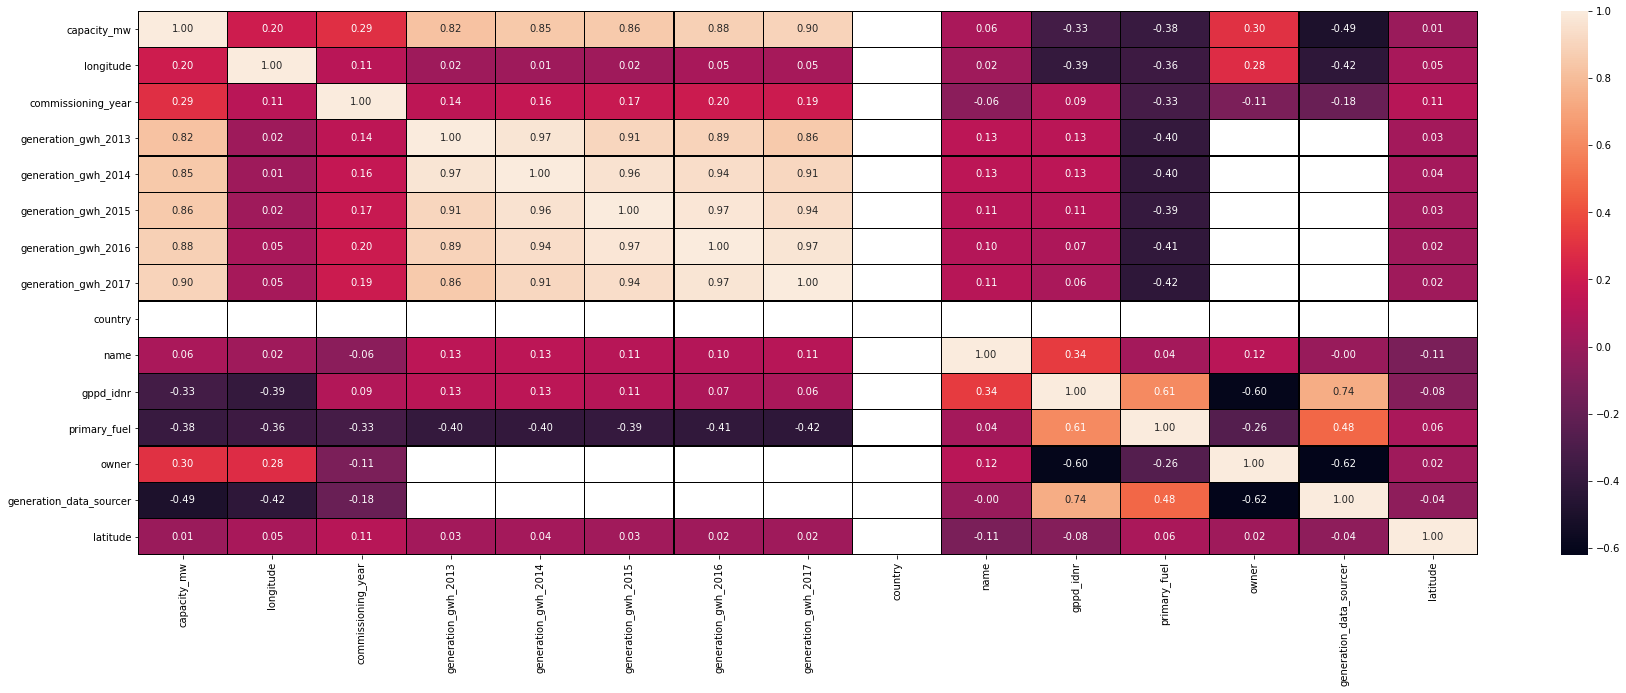

In [28]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

In [29]:
data.drop(['country'],axis=1,inplace=True)

<AxesSubplot:>

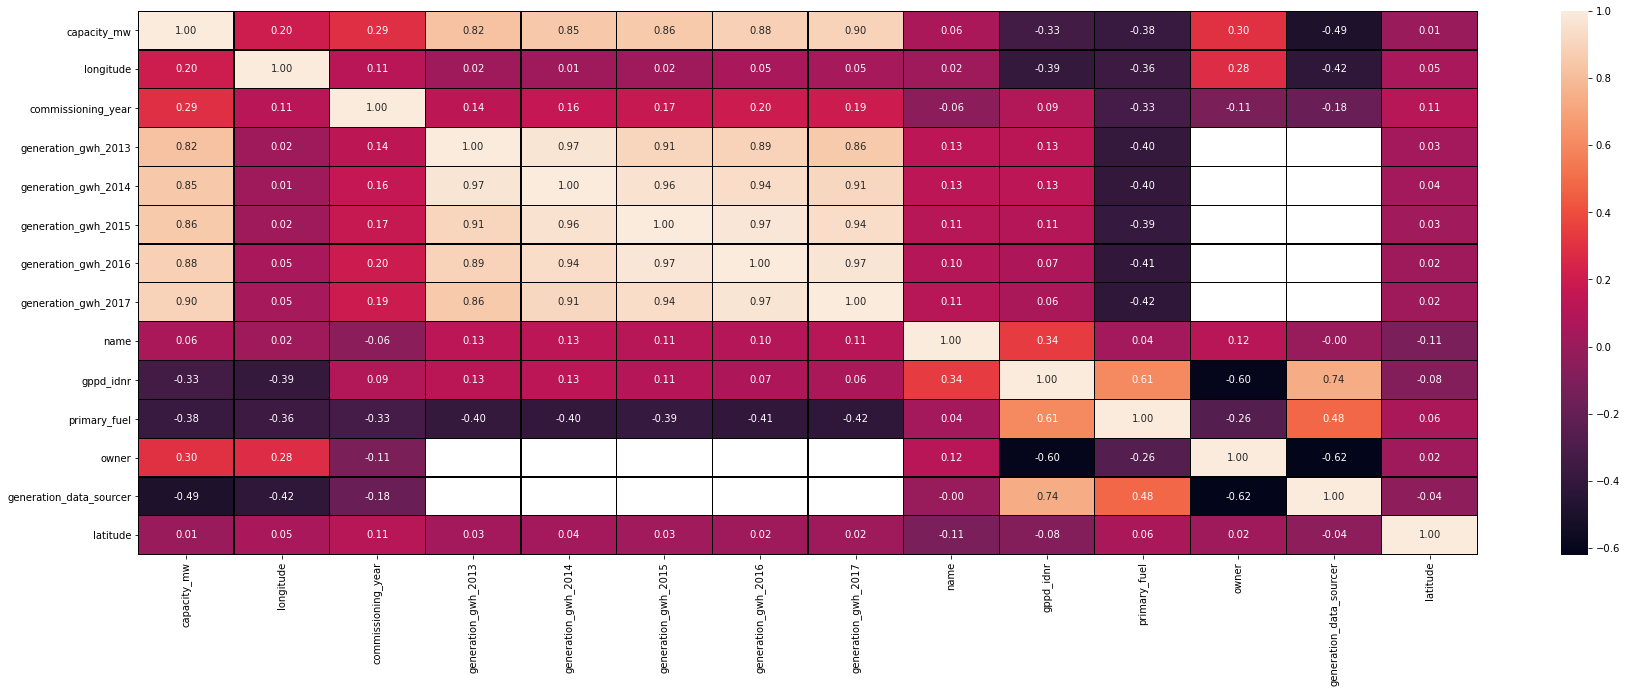

In [30]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

In [31]:
data.drop(['owner','generation_data_sourcer'],axis=1,inplace=True)

<AxesSubplot:>

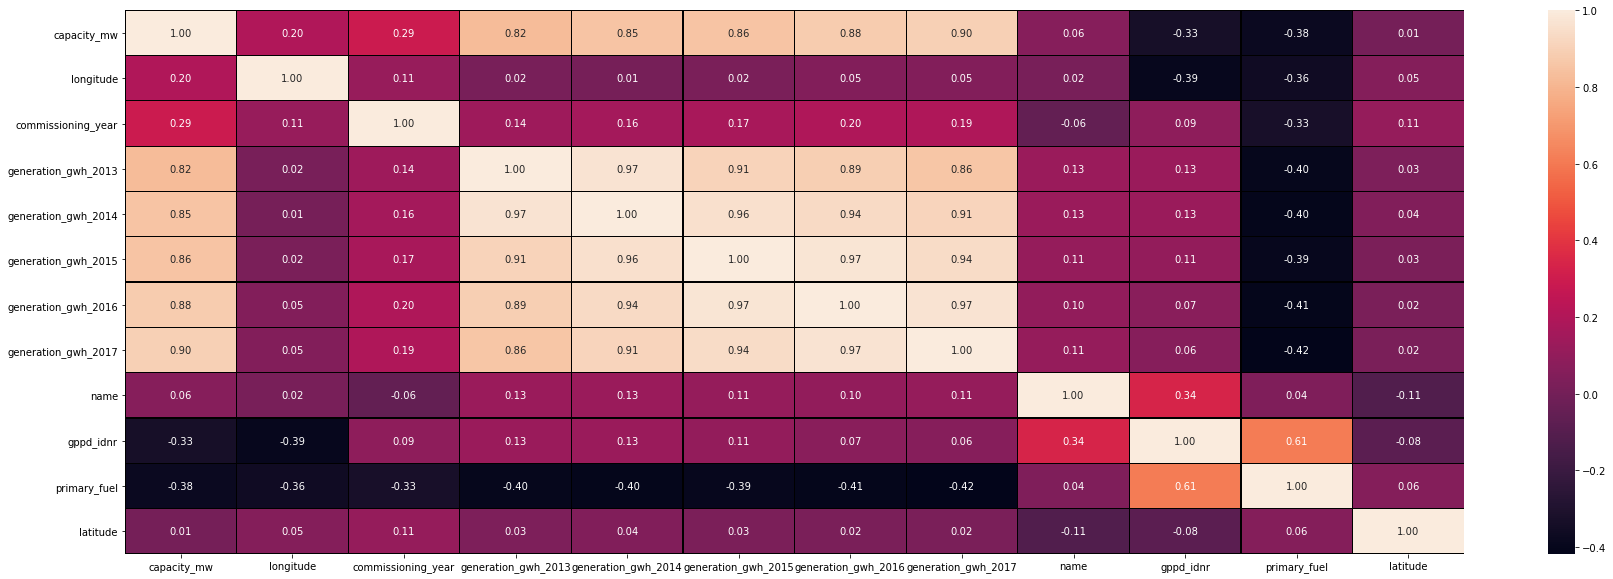

In [32]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

In [33]:
data.describe()

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,name,gppd_idnr,primary_fuel,latitude
count,908.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000,908.00000,908.00000,908.000000,908.000000
mean,321.046378,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,453.50000,453.50000,3.205947,436.335903
std,580.221767,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,262.26132,262.26132,2.281339,253.694871
min,0.000000,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,16.837500,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170,226.75000,226.75000,1.000000,214.750000
50%,60.000000,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700,453.50000,453.50000,3.000000,436.500000
75%,388.125000,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,680.25000,680.25000,6.000000,658.250000
max,4760.000000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,907.00000,907.00000,7.000000,837.000000


now in some of column we have less total count so lets will complete that

In [34]:
data['longitude']=data['longitude'].fillna(data['longitude'].mode()[0])
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mode()[0])
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mode()[0])
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mode()[0])
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mode()[0])
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mode()[0])






In [35]:
data.describe()

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,name,gppd_idnr,primary_fuel,latitude
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.00000,908.00000,908.000000,908.000000
mean,321.046378,77.156237,2003.624449,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,453.50000,453.50000,3.205947,436.335903
std,580.221767,4.945215,15.238021,2716.222621,2924.098882,3103.712012,3129.230619,3185.504866,262.26132,262.26132,2.281339,253.694871
min,0.000000,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,16.837500,73.812975,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,226.75000,226.75000,1.000000,214.750000
50%,60.000000,76.492900,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,453.50000,453.50000,3.000000,436.500000
75%,388.125000,79.211600,2013.000000,470.116200,570.095213,605.769975,669.808766,708.134037,680.25000,680.25000,6.000000,658.250000
max,4760.000000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,907.00000,907.00000,7.000000,837.000000


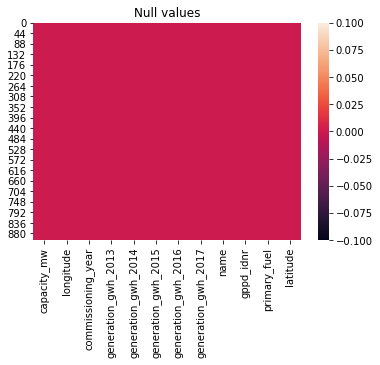

In [36]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

no NULL values present now

In [37]:
#replacing the zero values with the mean of the column
data['generation_gwh_2013']=data['generation_gwh_2013'].replace(0,data['generation_gwh_2013'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].replace(0,data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].replace(0,data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].replace(0,data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].replace(0,data['generation_gwh_2017'].mean())
data['name']=data['name'].replace(0,data['name'].mean())
data['gppd_idnr']=data['gppd_idnr'].replace(0,data['gppd_idnr'].mean())
data['latitude']=data['latitude'].replace(0,data['latitude'].mean())


In [38]:
data.describe()

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,name,gppd_idnr,primary_fuel,latitude
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,77.156237,2003.624449,1559.260853,1698.732328,1765.834162,1833.969615,1912.665099,453.999449,453.999449,3.205947,436.816449
std,580.221767,4.945215,15.238021,2542.619773,2734.828890,2917.001427,2931.430082,2974.938762,261.828188,261.828188,2.281339,253.280370
min,0.000000,68.644700,1927.000000,0.019900,0.045355,0.118300,0.099500,0.425769,1.000000,1.000000,0.000000,1.000000
25%,16.837500,73.812975,1997.000000,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,227.750000,227.750000,1.000000,215.750000
50%,60.000000,76.492900,2013.000000,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,453.750000,453.750000,3.000000,436.667952
75%,388.125000,79.211600,2013.000000,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,680.250000,680.250000,6.000000,658.250000
max,4760.000000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,907.000000,907.000000,7.000000,837.000000


In [39]:
data.corr()

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,name,gppd_idnr,primary_fuel,latitude
capacity_mw,1.000000,0.217022,0.012518,0.753651,0.798400,0.812510,0.844871,0.863117,0.058921,-0.335473,-0.377783,0.011175
longitude,0.217022,1.000000,-0.138390,0.103384,0.106275,0.111719,0.131386,0.141896,0.008593,-0.370530,-0.369505,-0.044389
commissioning_year,0.012518,-0.138390,1.000000,-0.027371,0.005534,0.033328,0.059075,0.069691,-0.039148,0.477675,0.145487,0.024702
generation_gwh_2013,0.753651,0.103384,-0.027371,1.000000,0.969075,0.904346,0.876329,0.837311,0.079049,-0.142163,-0.220897,0.026863
generation_gwh_2014,0.798400,0.106275,0.005534,0.969075,1.000000,0.962144,0.933784,0.904132,0.082801,-0.140375,-0.229337,0.029001
generation_gwh_2015,0.812510,0.111719,0.033328,0.904346,0.962144,1.000000,0.971543,0.937479,0.073926,-0.135432,-0.225331,0.023447
generation_gwh_2016,0.844871,0.131386,0.059075,0.876329,0.933784,0.971543,1.000000,0.971434,0.068501,-0.144613,-0.233173,0.018082
generation_gwh_2017,0.863117,0.141896,0.069691,0.837311,0.904132,0.937479,0.971434,1.000000,0.072045,-0.147196,-0.241220,0.024651
name,0.058921,0.008593,-0.039148,0.079049,0.082801,0.073926,0.068501,0.072045,1.000000,0.336110,0.041155,-0.112642
gppd_idnr,-0.335473,-0.370530,0.477675,-0.142163,-0.140375,-0.135432,-0.144613,-0.147196,0.336110,1.000000,0.607368,-0.078204


<AxesSubplot:>

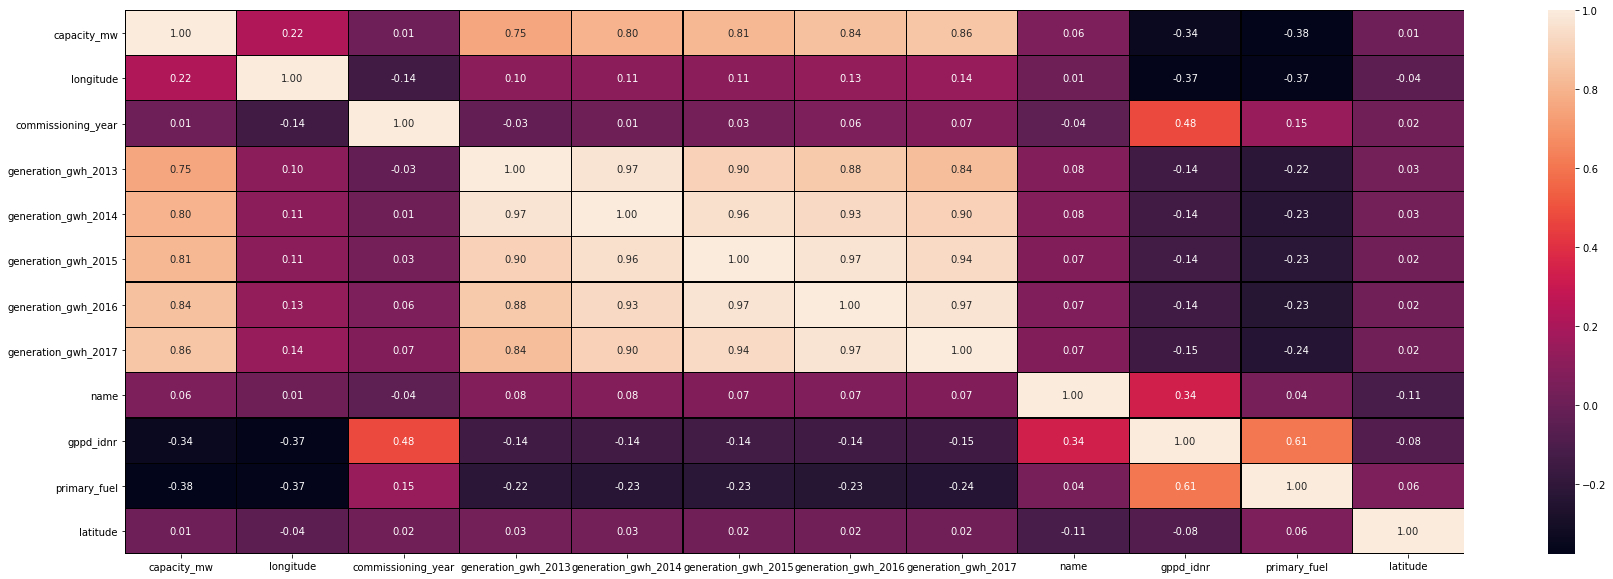

In [40]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

In [41]:
data.shape

(908, 12)

lets will check the outliers presents in each column with the help of box plot

capacity_mw                AxesSubplot(0.125,0.71587;0.227941x0.16413)
longitude               AxesSubplot(0.398529,0.71587;0.227941x0.16413)
commissioning_year      AxesSubplot(0.672059,0.71587;0.227941x0.16413)
generation_gwh_2013       AxesSubplot(0.125,0.518913;0.227941x0.16413)
generation_gwh_2014    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
generation_gwh_2015    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
generation_gwh_2016       AxesSubplot(0.125,0.321957;0.227941x0.16413)
generation_gwh_2017    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
name                   AxesSubplot(0.672059,0.321957;0.227941x0.16413)
gppd_idnr                    AxesSubplot(0.125,0.125;0.227941x0.16413)
primary_fuel              AxesSubplot(0.398529,0.125;0.227941x0.16413)
latitude                  AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

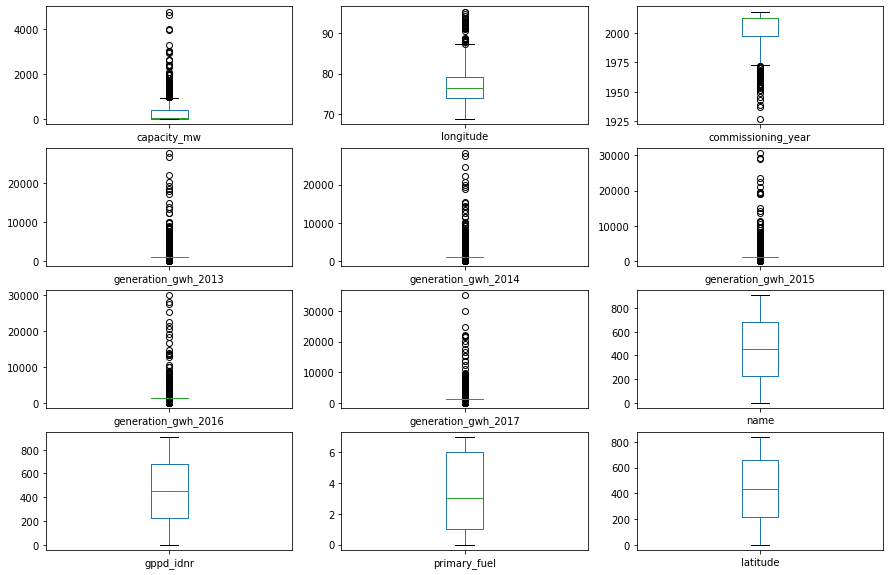

In [42]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(4,3),figsize = (15,10))

it indicate that some of column has a outliers in it so lets will deal with it

In [43]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[0.54931054 0.79221923 0.48428962 ... 0.77956839 1.22541756 1.15818344]
 [0.38462759 0.51537505 0.6156126  ... 0.25221473 0.96748576 0.61698278]
 [0.48602401 1.57471932 0.6156126  ... 1.52856344 1.66399822 0.06643119]
 ...
 [0.50964868 0.31869287 0.6156126  ... 1.67377677 1.66399822 1.12513029]
 [0.41566731 0.68963939 0.6156126  ... 0.32864279 0.96748576 0.53007464]
 [0.52516854 0.06485863 0.6156126  ... 1.61645572 1.66399822 1.59917466]]


In [44]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([  0,   0,   0, ..., 907, 907, 907], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(908, 12)


In [45]:
data_new=data[(z<3).all(axis = 1)]

In [46]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(908, 12)
(854, 12)
Shape after removing outlires (854, 12)


In [47]:
data.skew()

capacity_mw            2.000063
longitude              0.970020
commissioning_year    -1.593893
generation_gwh_2013    3.120037
generation_gwh_2014    2.961776
generation_gwh_2015    2.686907
generation_gwh_2016    2.632707
generation_gwh_2017    2.527145
name                   0.019573
gppd_idnr             -0.076352
primary_fuel           0.410229
latitude               0.019587
dtype: float64

so lets will remove the skewness from continuous type of data

In [48]:
#remove skewness
data['longitude']=np.sqrt(data['longitude'])
data['commissioning_year']=np.sqrt(data['commissioning_year'])
data['generation_gwh_2013']=np.sqrt(data['generation_gwh_2013'])
data['generation_gwh_2014']=np.sqrt(data['generation_gwh_2014'])
data['generation_gwh_2015']=np.sqrt(data['generation_gwh_2015'])
data['generation_gwh_2016']=np.sqrt(data['generation_gwh_2016'])
data['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])




In [49]:
data.skew()

capacity_mw            2.000063
longitude              0.883301
commissioning_year    -1.599712
generation_gwh_2013    1.665167
generation_gwh_2014    1.501455
generation_gwh_2015    1.155808
generation_gwh_2016    1.137372
generation_gwh_2017    1.074319
name                   0.019573
gppd_idnr             -0.076352
primary_fuel           0.410229
latitude               0.019587
dtype: float64

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'name'}>],
       [<AxesSubplot:title={'center':'gppd_idnr'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'latitude'}>]], dtype=object)

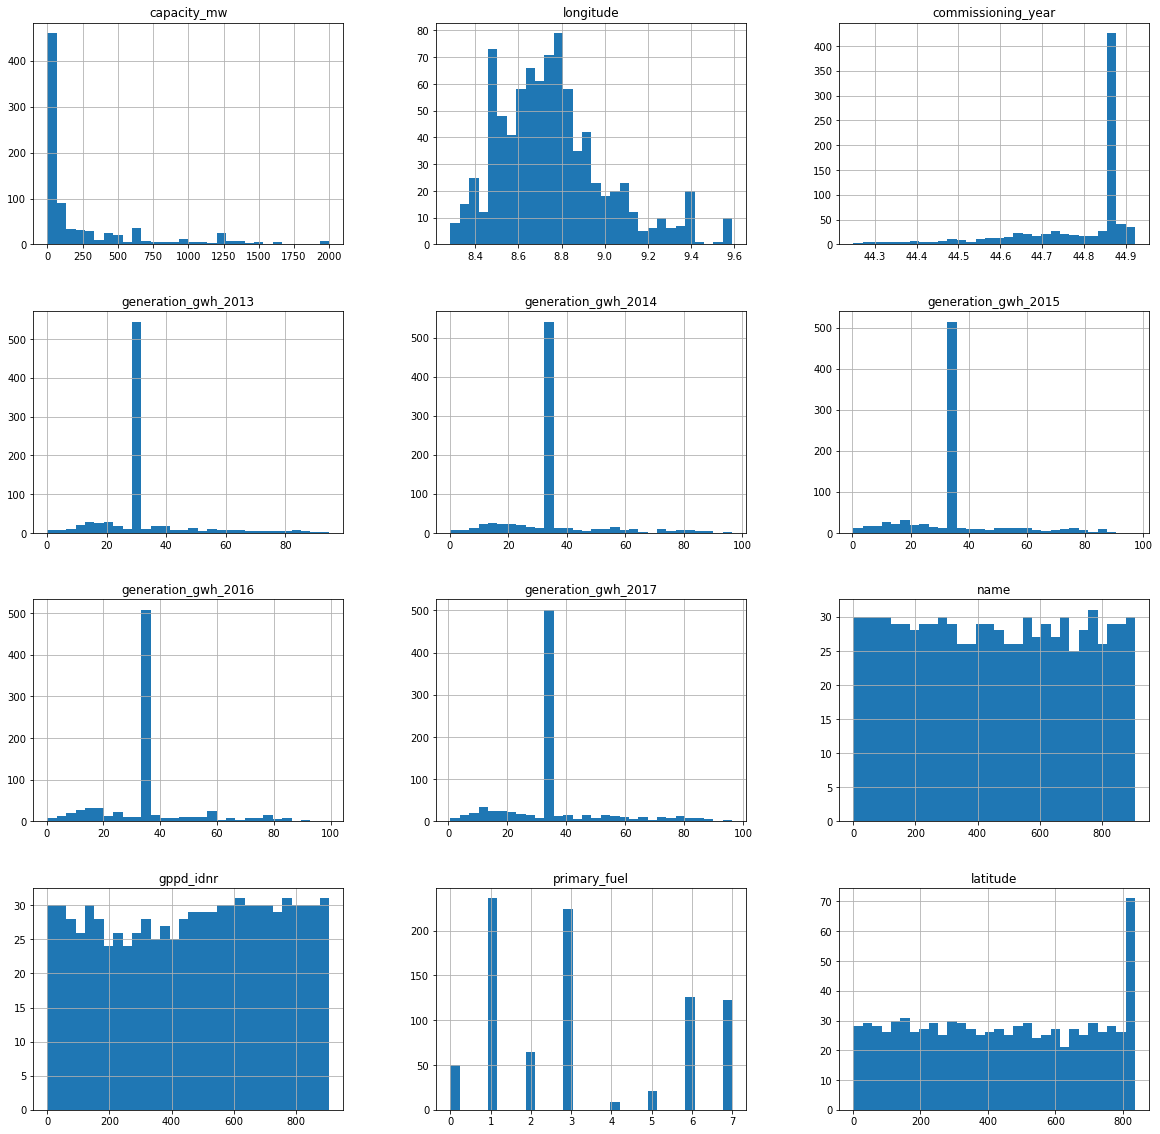

In [50]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (4,3), bins = 30)

it shows the distribution of data in various columns

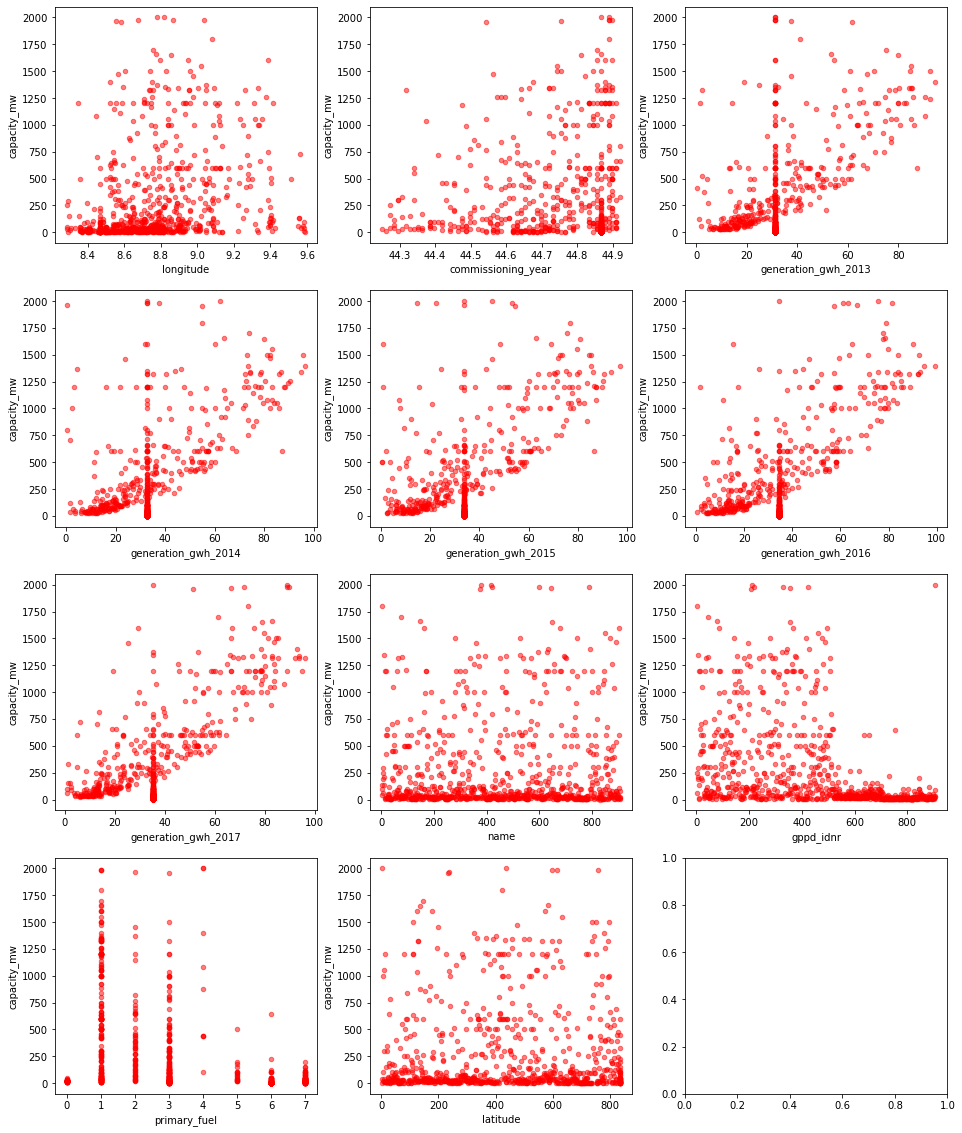

In [51]:
# setup figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='capacity_mw', ax=ax, alpha=0.5, color='r')


In [52]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['capacity_mw'])
y = data[["capacity_mw"]]
print(x.shape)
print(y.shape)

(854, 11)
(854, 1)


In [53]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [54]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(1,100):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.24)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  1 is 0.5184167379156581
R2 score correspond to random state  1 is 0.4616703467801596
R2 score correspond to random state  1 is 0.49611093188974953
R2 score correspond to random state  1 is 0.6279420769506454
R2 score correspond to random state  1 is 0.7184117195677331
R2 score correspond to random state  2 is 0.6836952776134798
R2 score correspond to random state  2 is 0.47602753101382556
R2 score correspond to random state  2 is 0.5268764085355677
R2 score correspond to random state  2 is 0.6751271700219317
R2 score correspond to random state  2 is 0.8226324942680394
R2 score correspond to random state  3 is 0.6050950961930168
R2 score correspond to random state  3 is 0.33895855987238344
R2 score correspond to random state  3 is 0.5599375661256285
R2 score correspond to random state  3 is 0.5620790785264191
R2 score correspond to random state  3 is 0.6875787426756197
R2 score correspond to random state  4 is 0.7223507311735045
R2 score correspond t

so we got a maximum accuracy of 85.15% for random state of 63 for GradientBoostingregressor among other algo

In [55]:
gbr = GradientBoostingRegressor()
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 74.57813752537317


Text(0, 0.5, 'Predicted_Y')

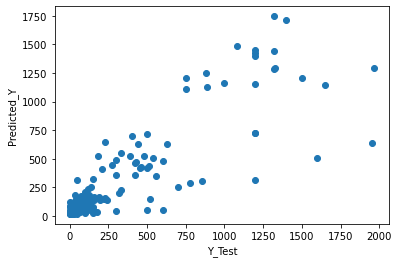

In [56]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

now lets will deal with classification problem

In [57]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [58]:
#assign the value of x and y for training and testing phase
x_c = data.drop(columns=['primary_fuel'])
y_c = data[["primary_fuel"]]
print(x_c.shape)
print(y_c.shape)


(854, 11)
(854, 1)


In [59]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [60]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(1,100):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.24)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
        

accuracy score correspond to random state  1 is 0.8097560975609757
accuracy score correspond to random state  1 is 0.6292682926829268
accuracy score correspond to random state  2 is 0.8341463414634146
accuracy score correspond to random state  2 is 0.6097560975609756
accuracy score correspond to random state  3 is 0.7414634146341463
accuracy score correspond to random state  3 is 0.6634146341463415
accuracy score correspond to random state  4 is 0.7951219512195122
accuracy score correspond to random state  4 is 0.6926829268292682
accuracy score correspond to random state  5 is 0.8
accuracy score correspond to random state  5 is 0.624390243902439
accuracy score correspond to random state  6 is 0.8146341463414634
accuracy score correspond to random state  6 is 0.6536585365853659
accuracy score correspond to random state  7 is 0.7609756097560976
accuracy score correspond to random state  7 is 0.6682926829268293
accuracy score correspond to random state  8 is 0.7902439024390244
accuracy sc

so we got maximum accuracy of 84.87% for DecisionTreeClassifier for random state 73 among other algo

In [62]:
#Checking the best parameter for prediction of DecisionTreeClassifier()
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=54)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)
                             

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [63]:
#Calculating the scores of different parameters
score = cross_val_score(clf,x_c,y_c,cv = 10,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  75.77428180574556
Mean Score      :  75.77428180574556
STD score       :  0.0


In [64]:
import pickle

In [65]:
#saving model to the local file system
filename='finalized_model_globalpowerplant.pickle'
pickle.dump(clf,open(filename,'wb'))

In [66]:
filename

'finalized_model_globalpowerplant.pickle'

# cross validation

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
for i in range(2,10):
    cv=cross_val_score(gbr,x,y,cv=i)
    print(gbr,cv.mean())


GradientBoostingRegressor() 0.7509526769424807
GradientBoostingRegressor() 0.7094570909711401
GradientBoostingRegressor() 0.7543491667600195
GradientBoostingRegressor() 0.6928923434677918
GradientBoostingRegressor() 0.7317906086686207
GradientBoostingRegressor() 0.7318346614399454
GradientBoostingRegressor() 0.7348985641440451
GradientBoostingRegressor() 0.7172576727495945


In [73]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-0.79124839,  0.46057975, -0.12185979, ...,  0.73271343,
         1.17585356,  1.16357104],
       [-0.47800042,  0.60927222, -0.12185979, ...,  0.21079137,
        -0.98088815,  0.62491055],
       [-1.69282337,  0.60927222, -0.12185979, ...,  1.47399403,
         1.6072019 , -0.05529576],
       ...,
       [-0.25719736,  0.60927222, -0.12185979, ...,  1.61771169,
         1.6072019 , -1.10902577],
       [-0.67484126,  0.60927222, -0.12185979, ...,  0.28643225,
        -0.98088815,  0.53841032],
       [ 0.16934541,  0.60927222, -0.12185979, ...,  1.56098103,
         1.6072019 , -1.58084517]])

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=51)

In [75]:
#lets plot and visualize
y_pred=gbr.predict(x_test)
y_pred

array([328.68872375, 328.68872375, 262.86546069, 336.71249031,
       328.68872375, 311.48412192, 262.86546069, 311.48412192,
       311.48412192, 311.48412192, 347.38317724, 311.48412192,
       311.48412192, 328.68872375, 311.48412192, 262.86546069,
       311.48412192, 328.68872375, 311.48412192, 336.71249031,
       308.29224895, 311.48412192, 336.71249031, 311.48412192,
       328.68872375, 311.48412192, 328.68872375, 308.29224895,
       336.71249031, 311.48412192, 328.68872375, 346.12831263,
       311.48412192, 311.48412192, 262.86546069, 336.71249031,
       311.48412192, 328.68872375, 262.86546069, 328.68872375,
       328.68872375, 311.48412192, 262.86546069, 311.48412192,
       311.48412192, 311.48412192, 311.48412192, 311.48412192,
       311.48412192, 311.48412192, 311.48412192, 311.48412192,
       328.68872375, 375.8034186 , 346.12831263, 311.48412192,
       346.12831263, 311.48412192, 346.12831263, 311.48412192,
       311.48412192, 346.12831263, 311.48412192, 311.48

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [77]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,30))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [79]:
from sklearn.metrics import r2_score

In [80]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7663308869075576